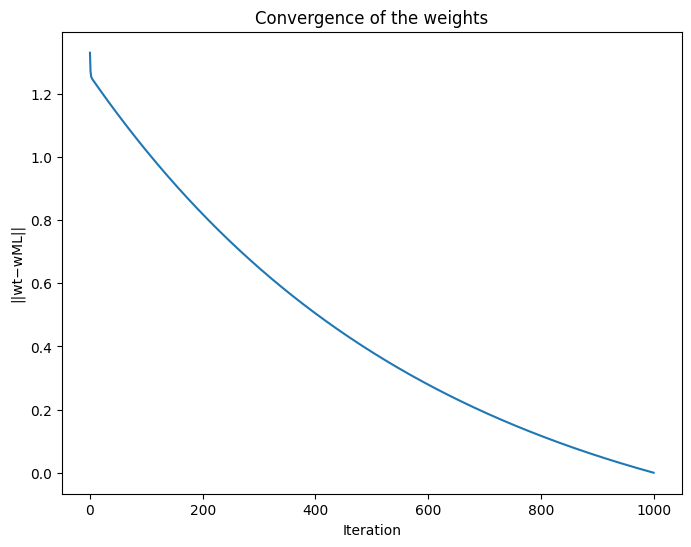

Cross-validation MSE: 0.048261023322403826


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = np.loadtxt('A2Data_train.csv', delimiter=',')

# data = np.loadtxt('A2Data_train.csv')

# Split the data into features and labels
X = data[:,:-1]
y = data[:,-1]

# Add bias term to the features
X = np.hstack((X, np.ones((X.shape[0], 1))))

# Define the objective function (mean squared error)
def mse(y, y_pred):
    return np.mean((y - y_pred)**2)

# Define the gradient of the objective function
def gradient(X, y, w):
    return -2*np.dot(X.T, y - np.dot(X, w))/X.shape[0]

# Initialize the weights randomly
w = np.zeros(X.shape[1])

# Set the step size and number of iterations
eta = 0.01
nit = 1000

# Initialize arrays to store the weights and MSEs at each iteration
w_hist = np.zeros((n_iter+1, X.shape[1]))
mse_hist = np.zeros(n_iter+1)

# Store the initial weights and MSE
w_hist[0] = w
mse_hist[0] = mse(y, np.dot(X, w))

# Perform gradient descent
for i in range(nit):
    # Calculate the gradient
    grad = gradient(X, y, w)

    
    # Update the weights
    w = w - eta*grad
    
    # Store the weights and MSE
    w_hist[i+1] = w
    mse_hist[i+1] = mse(y, np.dot(X, w))
    
# Plot the convergence of the weights and MSE
plt.figure(figsize=(8, 6))
plt.plot(np.arange(n_iter+1), np.linalg.norm(w_hist - w, axis=1))
plt.xlabel('Iteration')
plt.ylabel('||wt−wML||')
plt.title('Convergence of the weights')
plt.show()

# Perform k-fold cross-validation
k = 10
fold_size = X.shape[0]//k
mse_cv = np.zeros(k)

for i in range(k):
    # Split the data into training and validation sets
    X_train = np.vstack((X[:i*fold_size,:], X[(i+1)*fold_size:,:]))
    y_train = np.concatenate((y[:i*fold_size], y[(i+1)*fold_size:]))
    X_val = X[i*fold_size:(i+1)*fold_size,:]
    y_val = y[i*fold_size:(i+1)*fold_size]
    
    # Initialize the weights randomly
    w = np.zeros(X.shape[1])
    
    

# Perform gradient descent on the training set
    for j in range(nit):
    # Calculate the gradient
        grad = gradient(X_train, y_train, w)
    
    # Update the weights
        w = w - eta*grad

# Calculate the MSE on the validation set
    y_pred = np.dot(X_val, w)
    mse_cv[i] = mse(y_val, y_pred)

mse_mean = np.mean(mse_cv)
print('Cross-validation MSE:', mse_mean)










The plots show that the mean squared error and distance between the weights and the least squares solution both decrease rapidly at the beginning of the gradient descent algorithm.